In [37]:
from test_utils import *
tag = f"c0"
filter = LayerFilter(unselect_keys=['bn', 'num_batches_tracked','downsample'], all_select_keys=['layer'])
weight_dict = load_weight_dict_by_tag('../out/FedAdv-alexnet_avg/2024-06-12-13:44:15/weight_lists', tag)
# cal_similay_by_tag('weight_lists/202405281805-avg-ss/',"server", unselect_keys=['bn', 'num_batches_tracked','downsample'], describe='202405281805-avg-ss')


In [38]:
weight_dict[1][0].keys()

dict_keys(['base.conv1.weight', 'base.conv1.bias', 'base.bn1.weight', 'base.bn1.bias', 'base.bn1.running_mean', 'base.bn1.running_var', 'base.bn1.num_batches_tracked', 'base.conv2.weight', 'base.conv2.bias', 'base.bn2.weight', 'base.bn2.bias', 'base.bn2.running_mean', 'base.bn2.running_var', 'base.bn2.num_batches_tracked', 'base.conv3.weight', 'base.conv3.bias', 'base.bn3.weight', 'base.bn3.bias', 'base.bn3.running_mean', 'base.bn3.running_var', 'base.bn3.num_batches_tracked', 'base.conv4.weight', 'base.conv4.bias', 'base.bn4.weight', 'base.bn4.bias', 'base.bn4.running_mean', 'base.bn4.running_var', 'base.bn4.num_batches_tracked', 'base.conv5.weight', 'base.conv5.bias', 'base.bn5.weight', 'base.bn5.bias', 'base.bn5.running_mean', 'base.bn5.running_var', 'base.bn5.num_batches_tracked', 'classifier.fc1.weight', 'classifier.fc1.bias', 'classifier.bn6.weight', 'classifier.bn6.bias', 'classifier.bn6.running_mean', 'classifier.bn6.running_var', 'classifier.bn6.num_batches_tracked', 'classifi

In [59]:
from src.utils.my_utils import calculate_data_size

In [70]:
lf = LayerFilter(unselect_keys=['bias', 'bn'])

In [62]:
all_bytes = calculate_data_size(weight_dict[1][0])
ft_bytes = calculate_data_size(lf(weight_dict[1][0]))
print(f"all_bytes: {all_bytes}, ft_bytes: {ft_bytes}, ratio: {ft_bytes/all_bytes}")

all_bytes: 228271248, ft_bytes: 225691713, ratio: 0.9886996937958652


In [72]:
# 遍历所有层，计算参数大小
w = lf(weight_dict[1][0])
total_size = calculate_data_size(weight_dict[1][0])
for k in w.keys():
    size = calculate_data_size(w[k])
    print(f'{calculate_data_size(w[k])/total_size * 100:.2f}%\t{calculate_data_size(w[k])}\t{k}')

0.01%	19614	base.conv1.weight
0.54%	1229226	base.conv2.weight
1.16%	2654635	base.conv3.weight
1.55%	3539372	base.conv4.weight
1.03%	2359724	base.conv5.weight
66.15%	150995362	classifier.fc1.weight
29.40%	67109282	classifier.fc2.weight
0.07%	164255	classifier.fc3.weight


In [56]:
filter = LayerFilter(unselect_keys=['bn', 'num_batches_tracked', 'bias' 'fc1'])
filter_w_bias = LayerFilter(unselect_keys=['bn', 'num_batches_tracked', 'fc1'], all_select_keys=['bias'])

In [57]:
filtered = filter_params_dict(weight_dict, filter)
filtered_w_bias = filter_params_dict(weight_dict, filter_w_bias)
# score_matrix = cal_similar_layer_round(filtered, CKA, describe='FedAdv-lenet5_avg', tag=tag, save=True, show=False, cmp='end')

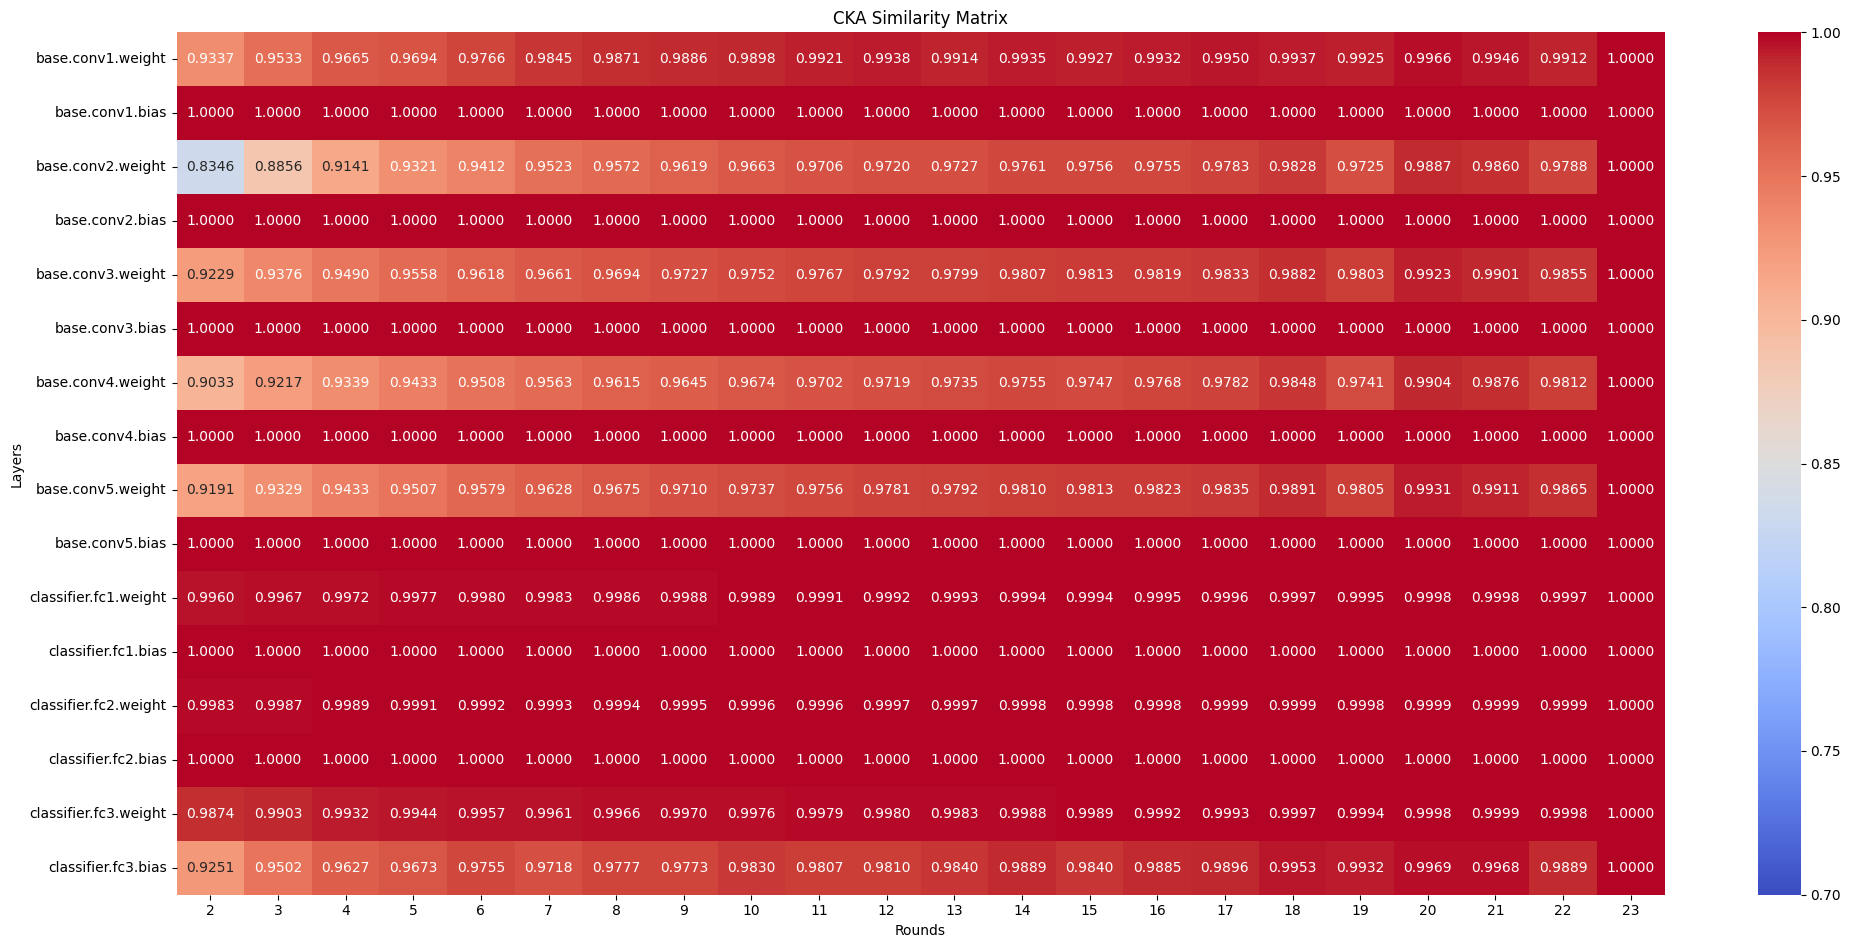

In [58]:
# server
vmin = 0.7
cmp = 'end'
_ = cal_similar_layer_round(filtered, begin_round = 1, save=False, show=True, cmp=cmp, vmax=1, vmin=vmin)

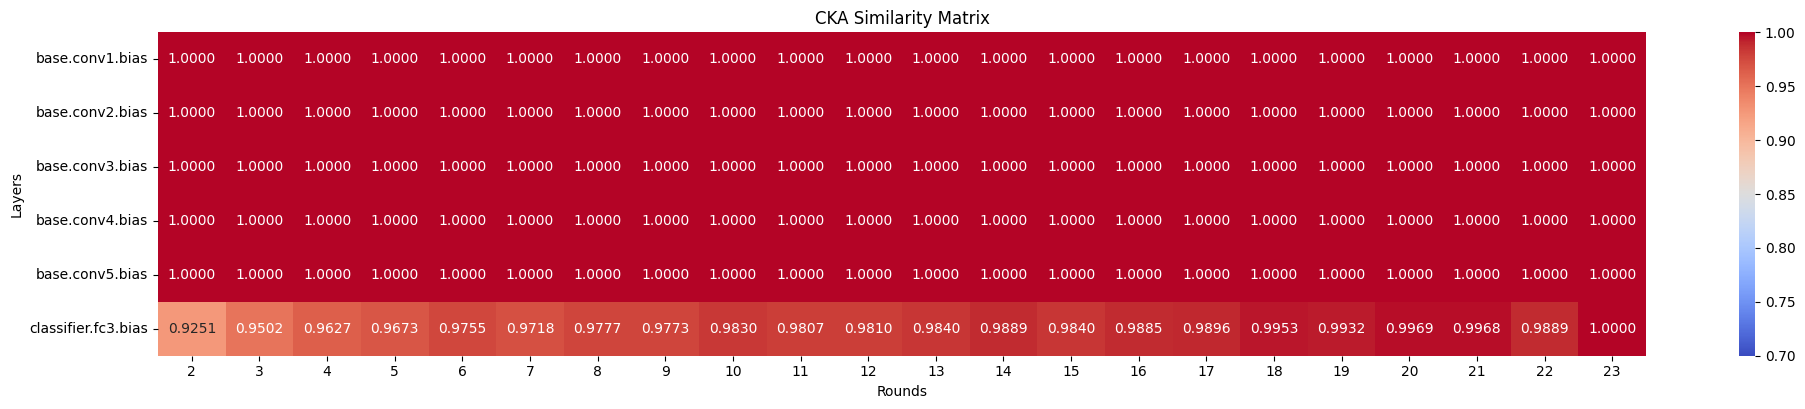

In [55]:
# server
vmin = 0.7
cmp = 'end'
_ = cal_similar_layer_round(filtered_w_bias, begin_round = 1, save=False, show=True, cmp=cmp, vmax=1, vmin=vmin)

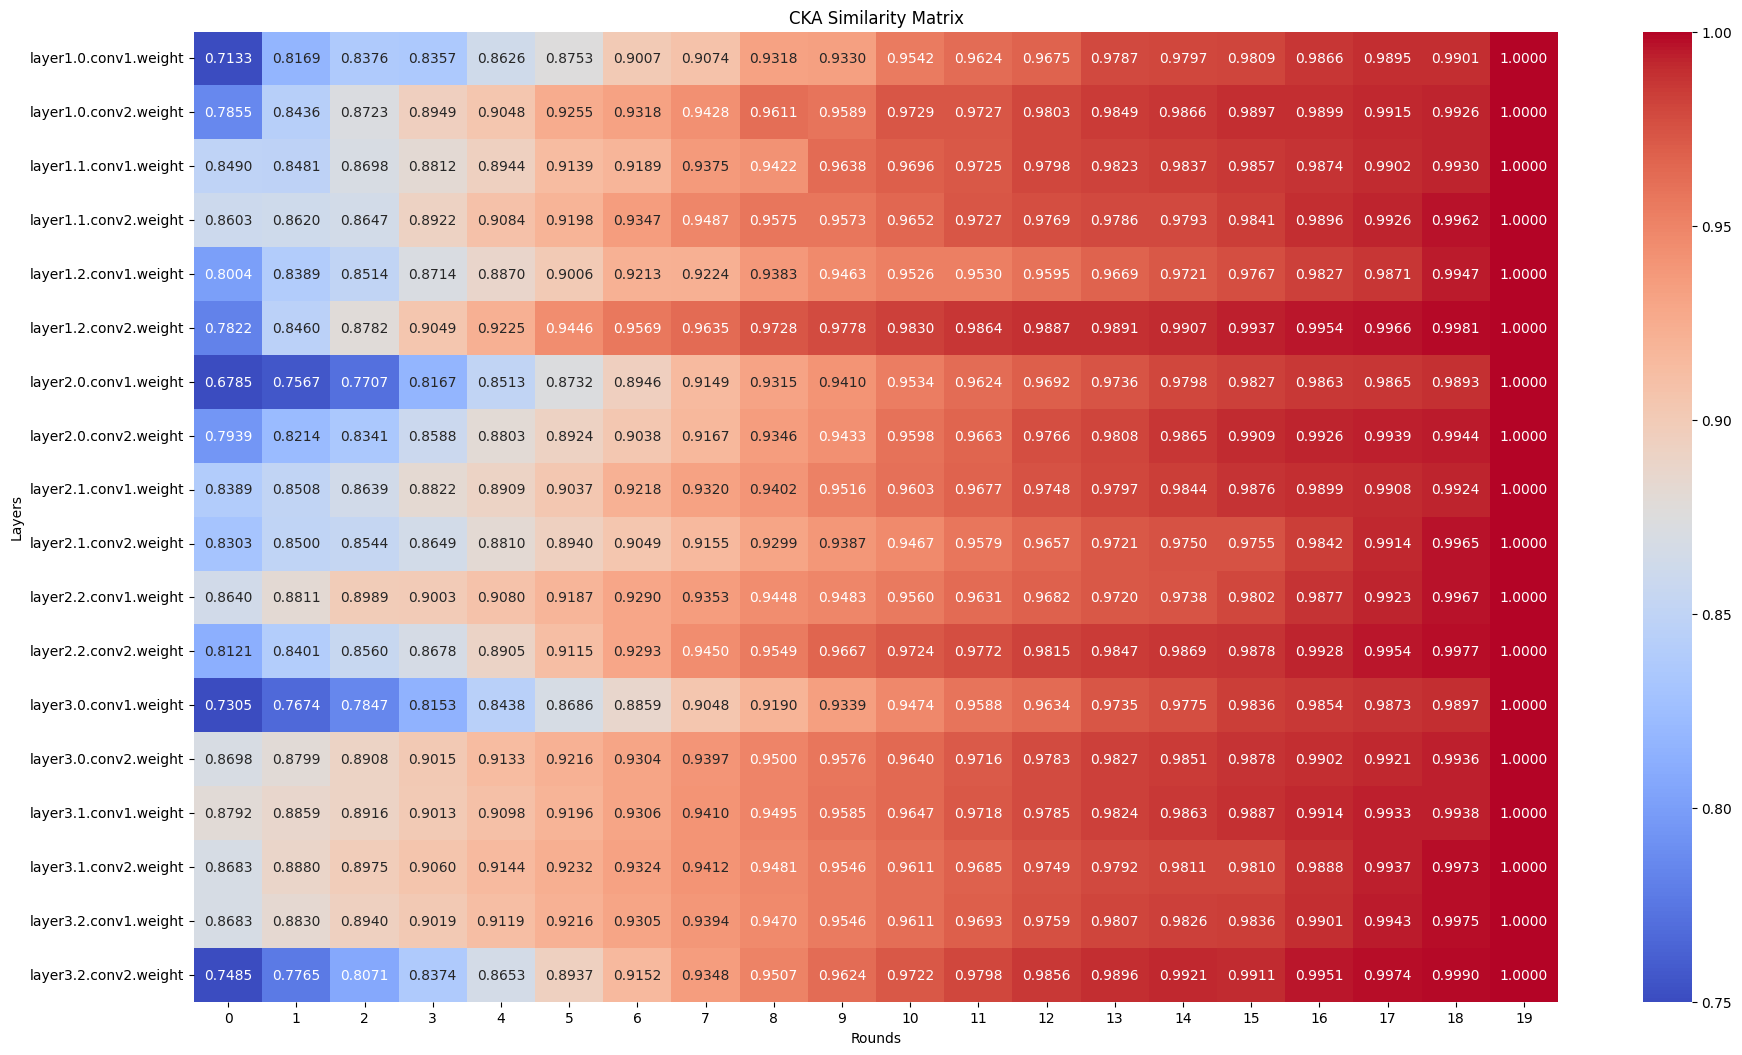

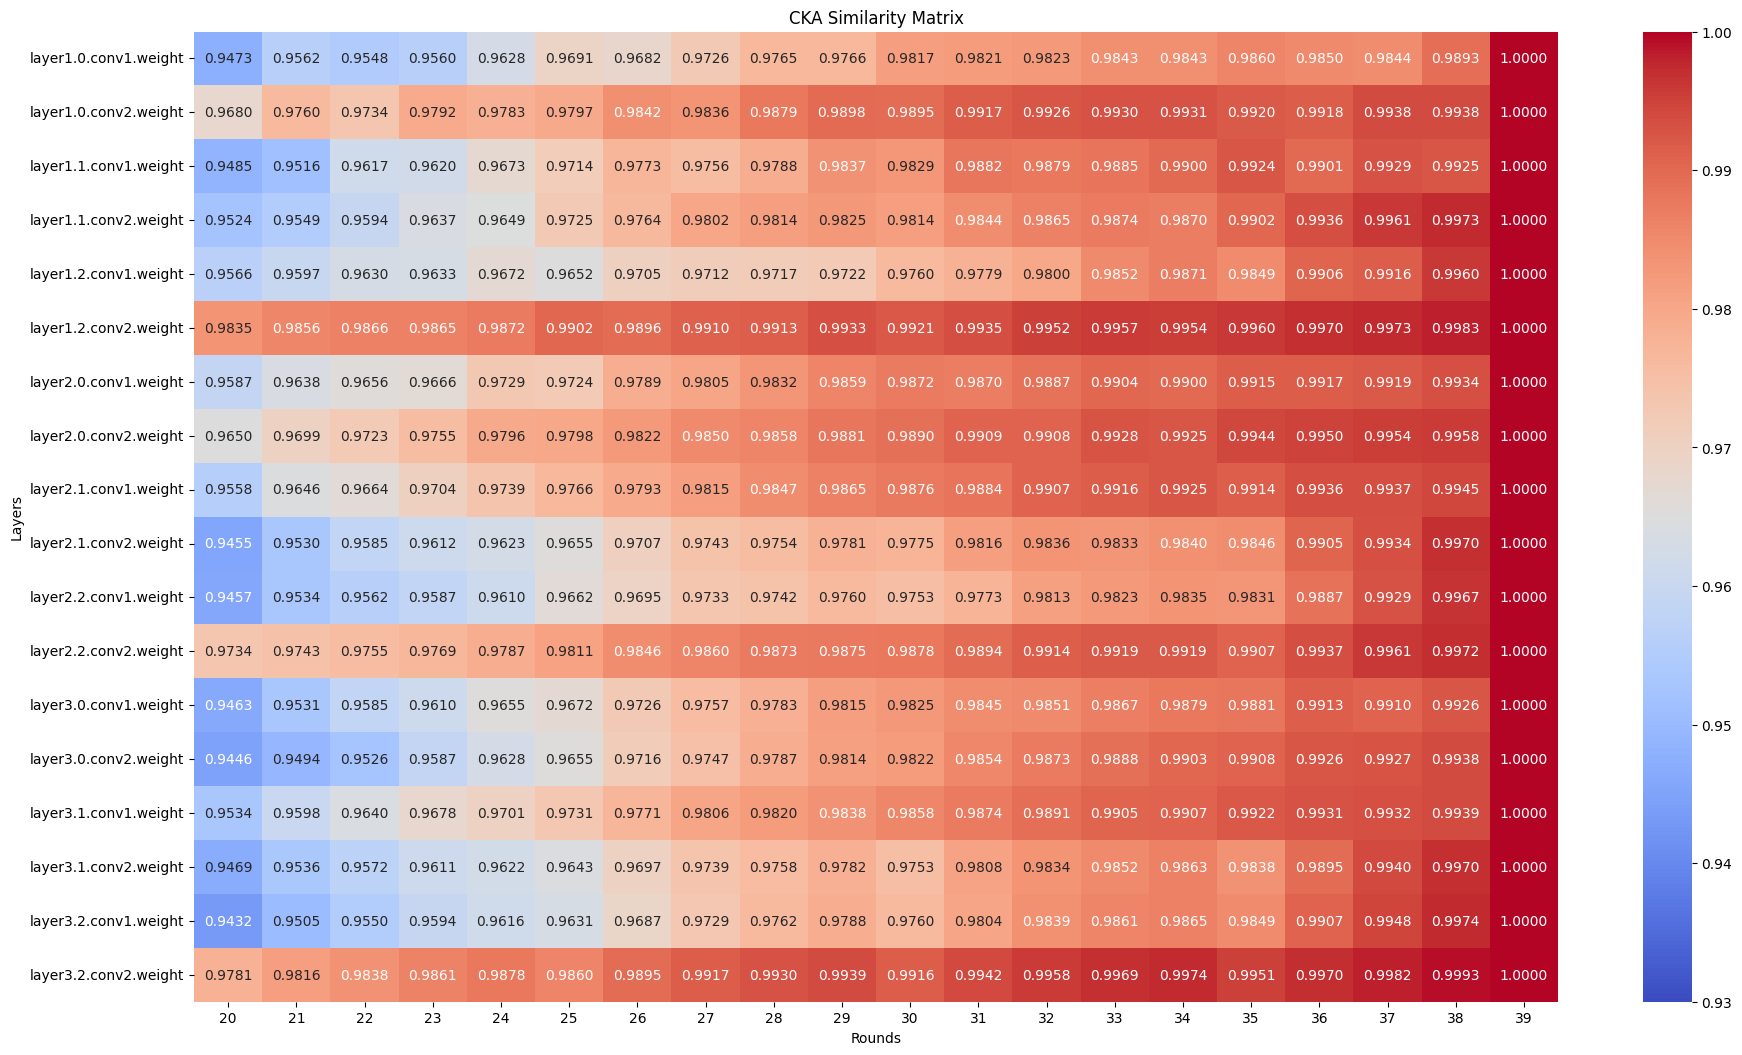

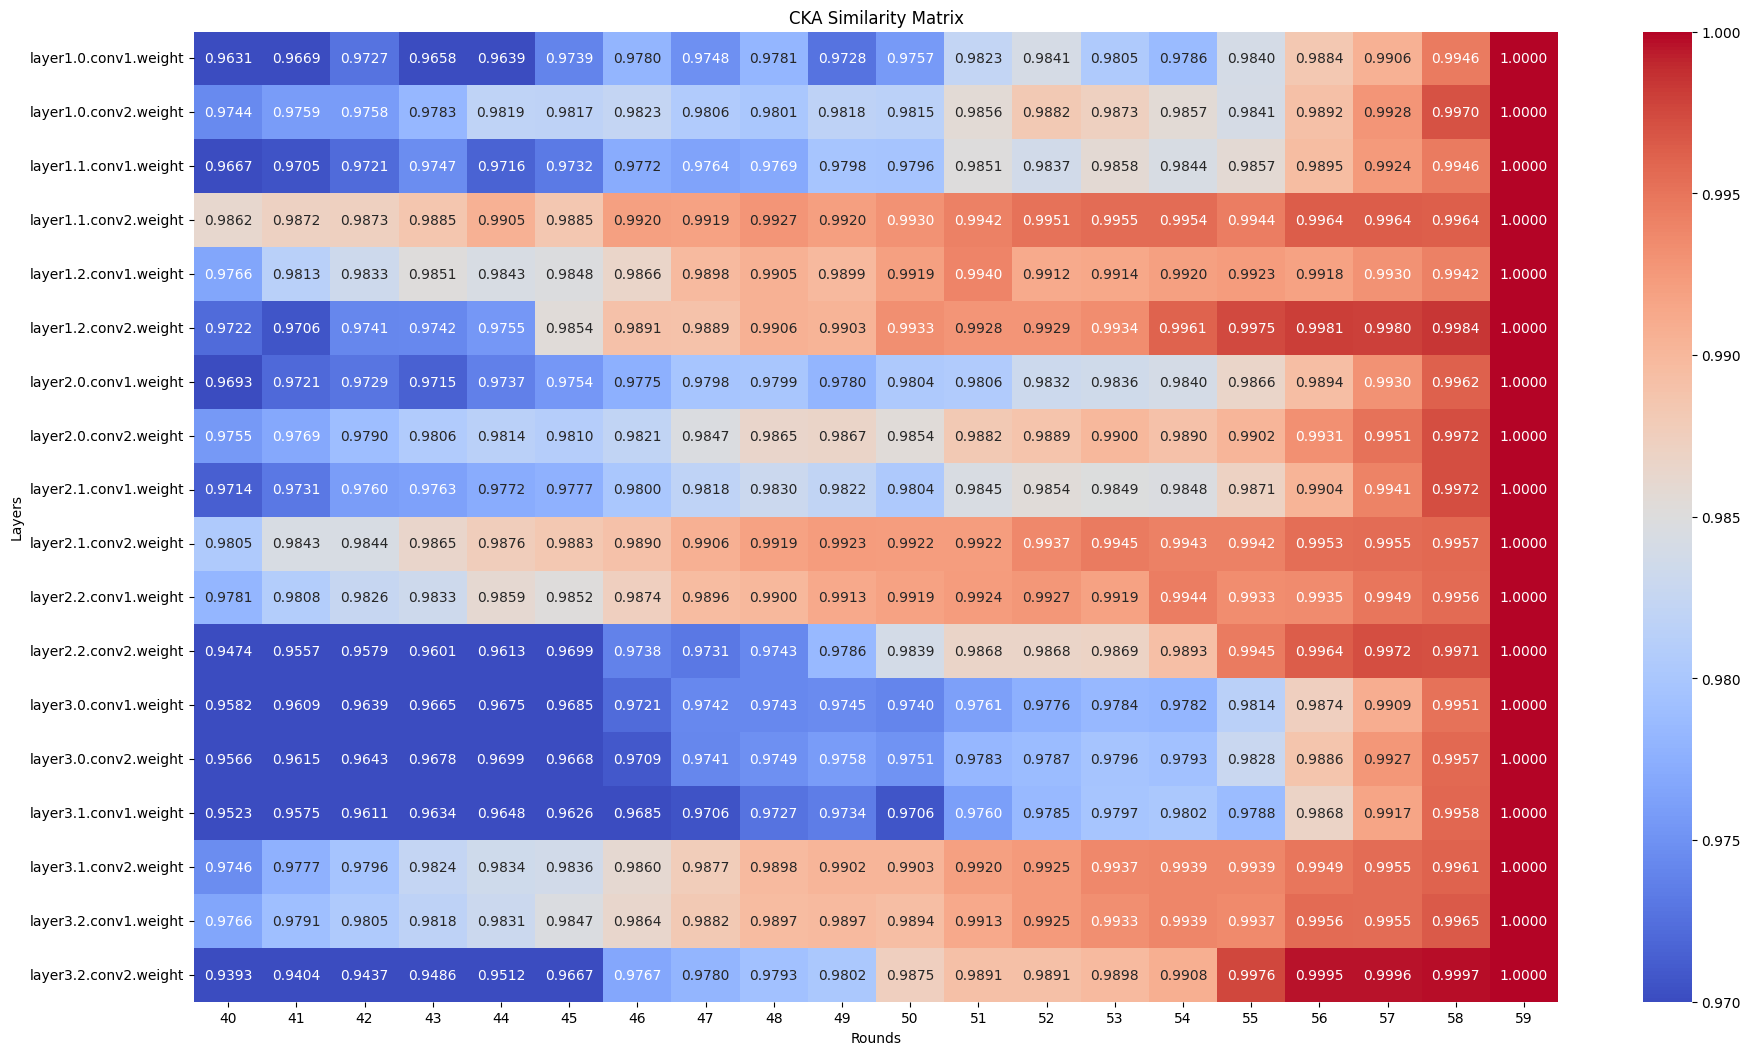

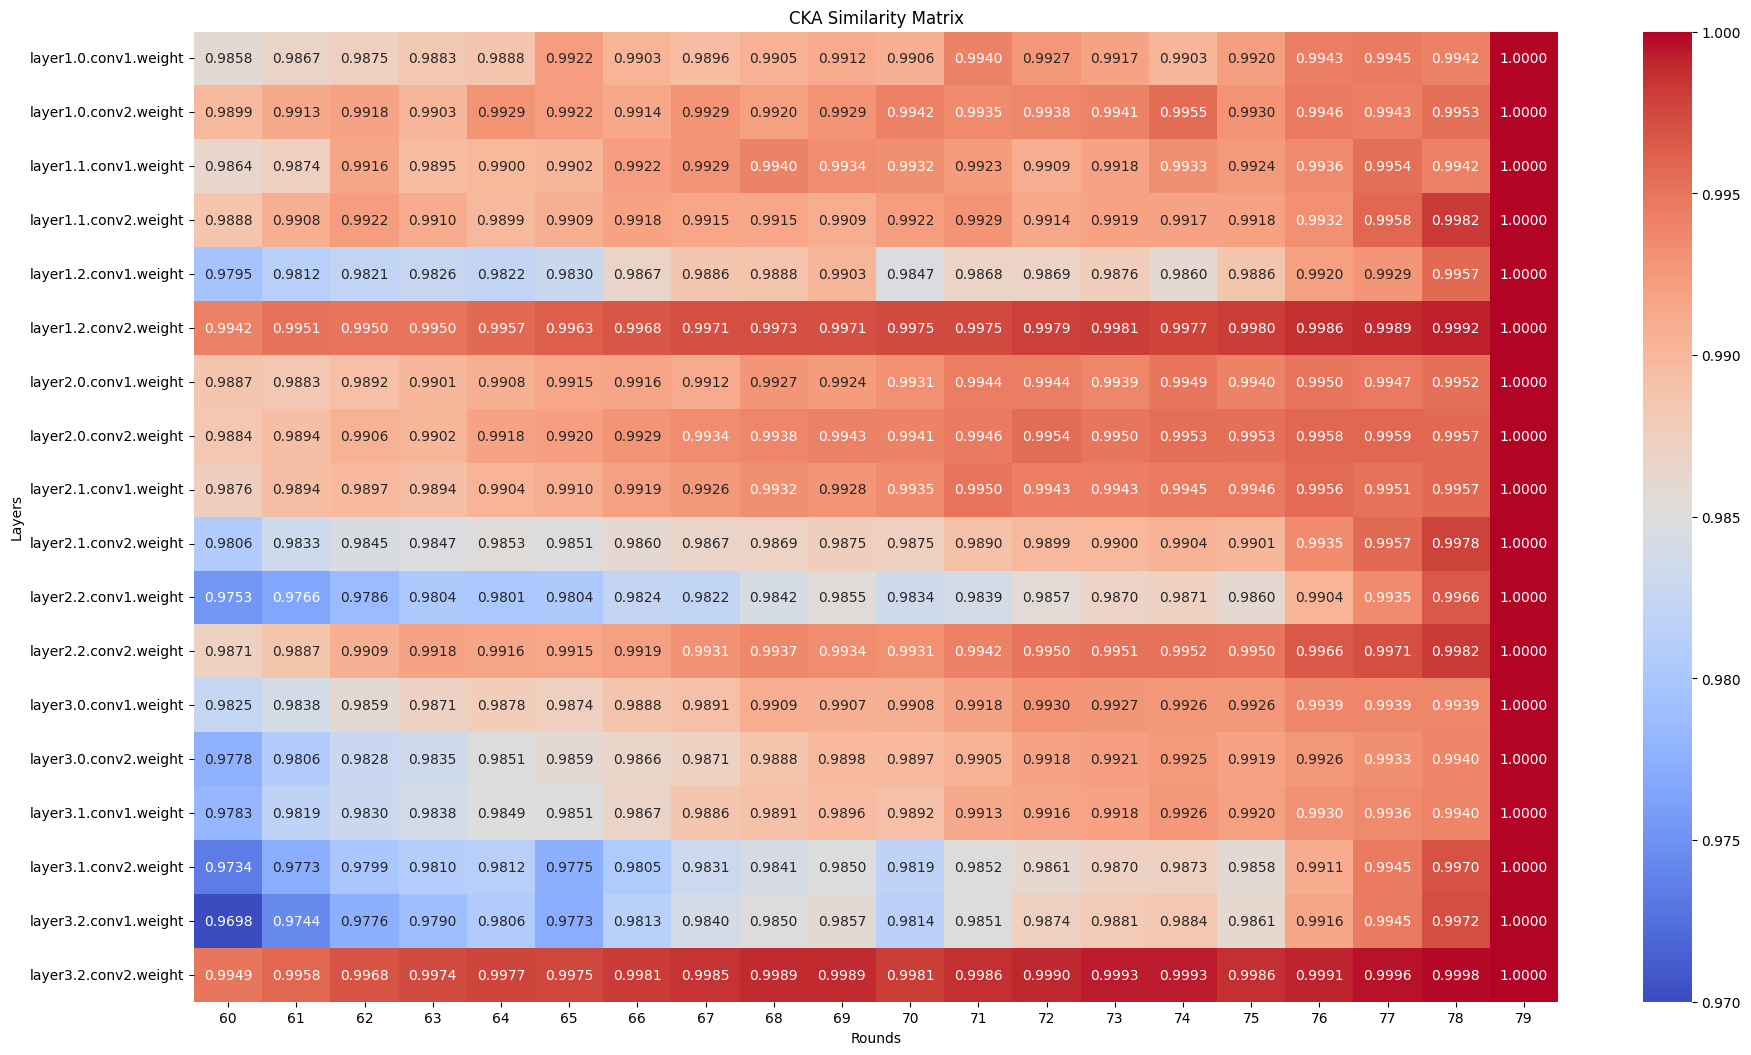

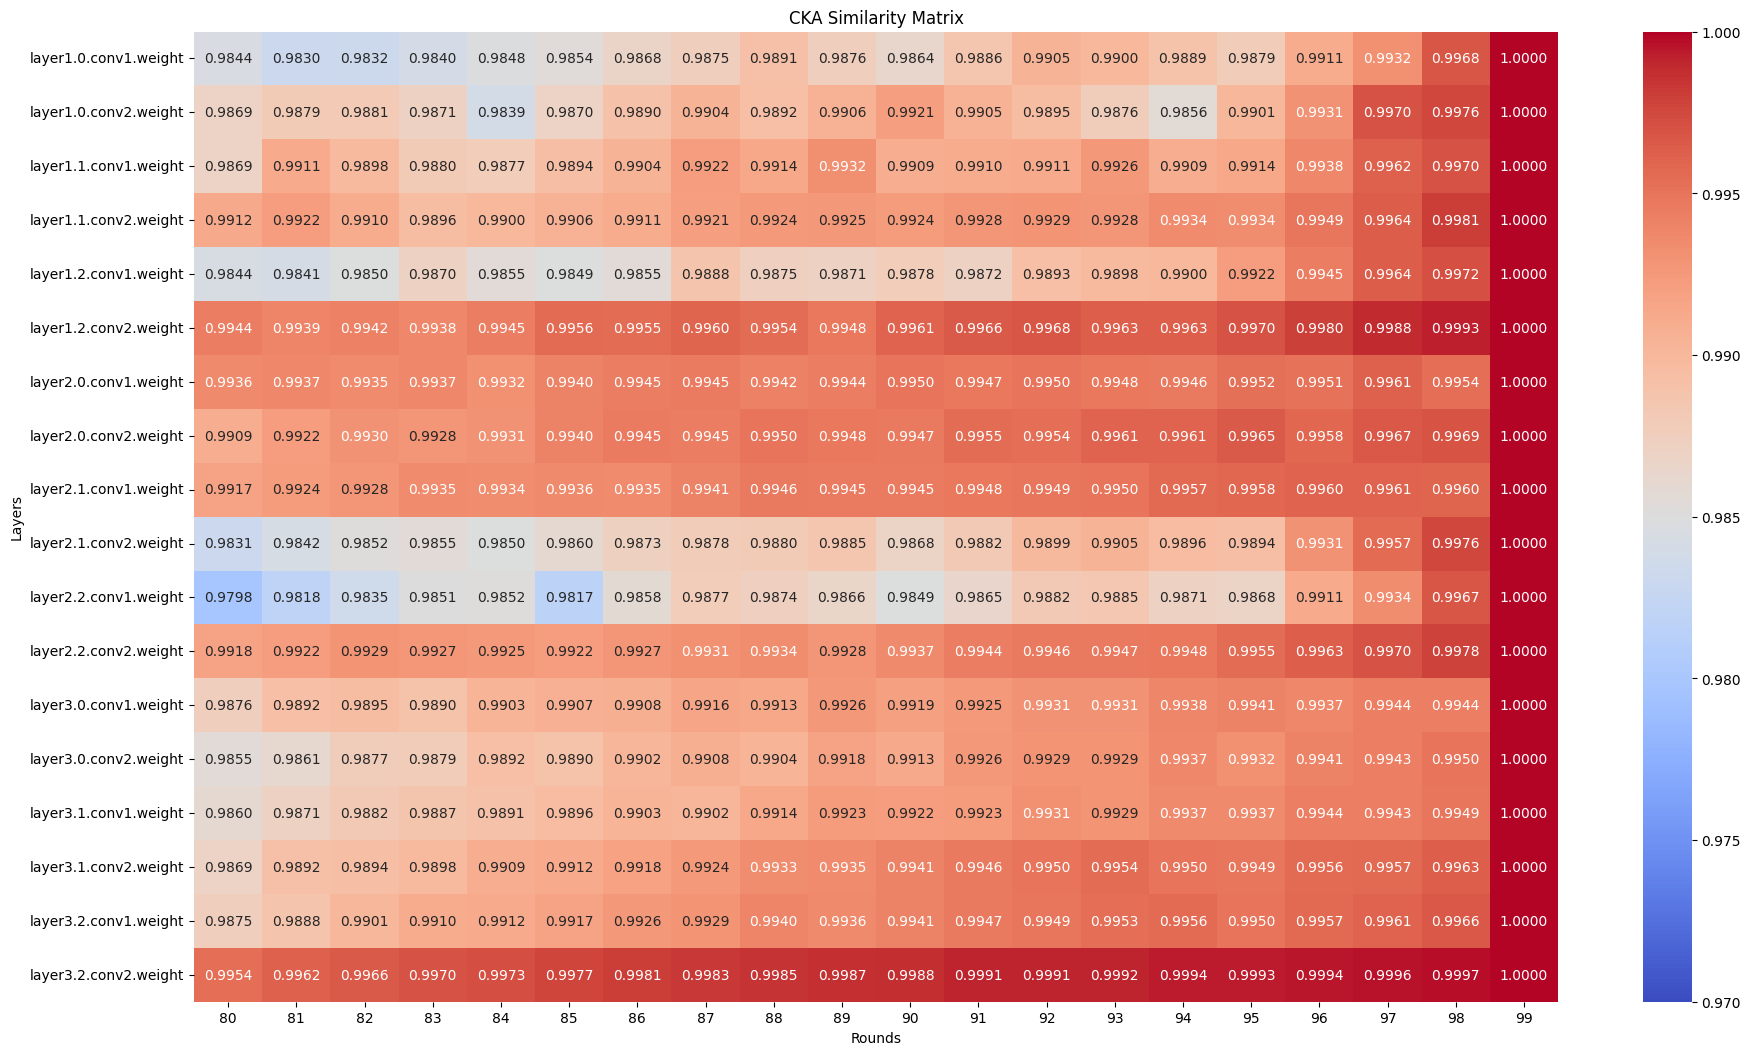

array([[0.98442925, 0.98300958, 0.9831732 , 0.98400547, 0.98482565,
        0.98543358, 0.98675003, 0.98748673, 0.98912947, 0.98756017,
        0.98636175, 0.98862001, 0.99049867, 0.99002103, 0.98892608,
        0.98791094, 0.9910555 , 0.9932015 , 0.99682331, 1.        ],
       [0.98692376, 0.98794524, 0.98809104, 0.98713146, 0.98390025,
        0.98696067, 0.98900404, 0.99043148, 0.98924186, 0.9906002 ,
        0.99206246, 0.99053579, 0.98951606, 0.9876122 , 0.98560936,
        0.99013108, 0.99307315, 0.99704068, 0.99762395, 1.        ],
       [0.98688456, 0.99112551, 0.9897617 , 0.98799483, 0.98773981,
        0.98944527, 0.99042603, 0.99222518, 0.99139036, 0.99320961,
        0.99089414, 0.99099143, 0.99112607, 0.99259309, 0.99094145,
        0.991404  , 0.99377997, 0.99620776, 0.99702969, 1.        ],
       [0.99124207, 0.99221891, 0.99102523, 0.98956912, 0.99003059,
        0.99058156, 0.99108292, 0.99207369, 0.99242439, 0.99251392,
        0.99238146, 0.99279364, 0.99287881, 0

In [6]:
vmin = 0.75
cal_similar_layer_round(filtered, begin_round = 0, round_step = 20, save=False, show=True, cmp='end', vmax=1, vmin=vmin)
vmin = 0.93
cal_similar_layer_round(filtered, begin_round = 20, round_step = 20, save=False, show=True, cmp='end', vmax=1, vmin=vmin)
vmin = 0.97
cal_similar_layer_round(filtered, begin_round = 40, round_step = 20, save=False, show=True, cmp='end', vmax=1, vmin=vmin)
cal_similar_layer_round(filtered, begin_round = 60, round_step = 20, save=False, show=True, cmp='end', vmax=1, vmin=vmin)
cal_similar_layer_round(filtered, begin_round = 80, round_step = 20, save=False, show=True, cmp='end', vmax=1, vmin=vmin)

In [ ]:
cal_similar_layer_round(filtered, begin_round = 60, round_step = 10, save=False, show=True, cmp='end')

## 接下来是折线图

In [ ]:
layer_labels = list(filtered[list(filtered.keys())[-1]][0].keys())
x_labels = []
rounds = sorted(filtered.keys())
for outer_round in rounds:
    for inner_round in range(len(filtered[outer_round])):
        x_labels.append(f'{outer_round}_{inner_round}')


In [ ]:
plot_score_matrix(score_matrix[1:7,], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels, 
                    layer_labels=layer_labels[1:7])
plot_score_matrix(score_matrix[7:13,], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels, 
                    layer_labels=layer_labels[7:13])

In [ ]:
# 红色六种，要求区分度明显
colors_red_six = ['#FF0000', '#FF4500', '#FF6347', '#FF7F50', '#FF8C00', '#FFA500']
colors_blue_six = ['#0000FF', '#0000CD', '#00008B', '#0000FF', '#0000CD', '#00008B']
colors_green_six = ['#008000', '#006400', '#00FF00', '#32CD32', '#3CB371', '#2E8B57']
colors_grey_six = ['#808080', '#A9A9A9', '#D3D3D3', '#DCDCDC', '#F5F5F5', '#FFF']

plot_score_matrix(score_matrix, 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels, 
                    layer_labels=layer_labels,
                    colors=colors_grey_six[0:1] + colors_red_six + colors_blue_six + colors_green_six + colors_grey_six[1:3] )

In [ ]:
plot_score_matrix(score_matrix[:,0:100], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[0:100],
                    layer_labels=layer_labels,
                    colors=colors_grey_six[0:1] + colors_red_six + colors_blue_six + colors_green_six + colors_grey_six[1:3] )
# plot_score_matrix(score_matrix[:,100:200], 
#                     save=False, 
#                     show=True, 
#                     title='avg_pro',
#                     x_labels=x_labels[100:200],
#                     layer_labels=layer_labels,
#                     colors=colors_grey_six[0:1] + colors_red_six + colors_blue_six + colors_green_six + colors_grey_six[1:3] )
# plot_score_matrix(score_matrix[:,200:300], 
#                     save=False, 
#                     show=True, 
#                     title='avg_pro',
#                     x_labels=x_labels[200:300],
#                     layer_labels=layer_labels,
#                     colors=colors_grey_six[0:1] + colors_red_six + colors_blue_six + colors_green_six + colors_grey_six[1:3] )
# plot_score_matrix(score_matrix[:,300:400], 
#                     save=False, 
#                     show=True, 
#                     title='avg_pro',
#                     x_labels=x_labels[300:400],
#                     layer_labels=layer_labels,
#                     colors=colors_grey_six[0:1] + colors_red_six + colors_blue_six + colors_green_six + colors_grey_six[1:3] )

In [ ]:
# Stage 1
plot_score_matrix(score_matrix[1:7,0:100], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[0:100],
                    layer_labels=layer_labels[1:7],
                    colors=colors_red_six)
plot_score_matrix(score_matrix[1:7,100:200], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[100:200],
                    layer_labels=layer_labels[1:7],
                    colors=colors_red_six)
plot_score_matrix(score_matrix[1:7,200:300], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[200:300],
                    layer_labels=layer_labels[1:7],
                    colors=colors_red_six)
plot_score_matrix(score_matrix[1:7,300:400], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[300:400],
                    layer_labels=layer_labels[1:7],
                    colors=colors_red_six)

In [ ]:
# Stage 2
plot_score_matrix(score_matrix[7:13,0:100], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[0:100],
                    layer_labels=layer_labels[7:13],
                    colors=colors_blue_six)
plot_score_matrix(score_matrix[7:13,100:200], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[100:200],
                    layer_labels=layer_labels[7:13],
                    colors=colors_blue_six)
plot_score_matrix(score_matrix[7:13,200:300], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[200:300],
                    layer_labels=layer_labels[7:13],
                    colors=colors_blue_six)
plot_score_matrix(score_matrix[7:13,300:400], 
                    save=False, 
                    show=True, 
                    title='avg_pro',
                    x_labels=x_labels[300:400],
                    layer_labels=layer_labels[7:13],
                    colors=colors_blue_six)